# import

In [2]:
from Utilities.utils import *

# Get the current working directory
current_working_dir = os.path.join(Path(os.getcwd()).parent,'data') 
ED9_data_dict = load_h5(os.path.join(current_working_dir,r"ED9_data.h5"))

# Colors
pink_ = '#D03E9F'
blue_ = '#6373B1'
grey_ = '#767676'


# figure C

{'whiskers': [<matplotlib.lines.Line2D at 0x2af64f03df0>,
 'caps': [<matplotlib.lines.Line2D at 0x2af64f54430>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2af64f03820>],
 'medians': [<matplotlib.lines.Line2D at 0x2af64f54a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2af64f54c40>],
 'means': []}

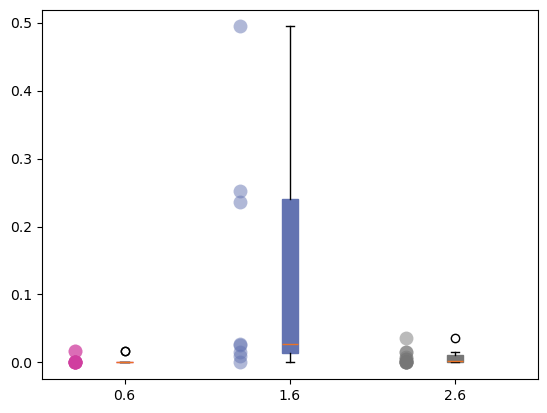

In [3]:
false_positive_df = pd.DataFrame(ED9_data_dict['false_positive_df'])

fig, ax = plt.subplots()

ppseq = list(false_positive_df[false_positive_df.position == 'ppseq'].value.astype(float))
decoder1 = list(false_positive_df[false_positive_df.position == 'decoder1'].value.astype(float))
decoder2 = list(false_positive_df[false_positive_df.position == 'decoder2'].value.astype(float))

# Plot jittered scatter plot
ax.plot(np.ones(len(ppseq))*0.3, ppseq, 'o',color=pink_, alpha=0.5, label='Data',markeredgewidth=0,markersize = 10)
ax.plot(np.ones(len(decoder1))*1.3, decoder1, 'o',color=blue_, alpha=0.5, label='Data',markeredgewidth=0,markersize = 10)
ax.plot(np.ones(len(decoder2))*2.3, decoder2, 'o',color=grey_, alpha=0.5, label='Data',markeredgewidth=0,markersize = 10)

ax.boxplot(ppseq, positions=[0.6], widths=0.1, patch_artist=True, boxprops=dict(facecolor=pink_, color=pink_), medianprops=dict(color='#EB7224'))
ax.boxplot(decoder1, positions=[1.6], widths=0.1, patch_artist=True, boxprops=dict(facecolor=blue_, color=blue_), medianprops=dict(color='#EB7224'))
ax.boxplot(decoder2, positions=[2.6], widths=0.1, patch_artist=True, boxprops=dict(facecolor=grey_, color=grey_), medianprops=dict(color='#EB7224'))


# figure D

------------------------------------------------
Kruskal-Wallis Test:
Statistic: 25.33360848853807
p-value: 3.154109840449551e-06

Dunn's Test (with Bonferroni correction):
          1         2         3
1  1.000000  0.028139  0.000002
2  0.028139  1.000000  0.199712
3  0.000002  0.199712  1.000000
------------------------------------------------
Kruskal-Wallis Test:
Statistic: 24.271951831409933
p-value: 5.363059649004156e-06

Dunn's Test (with Bonferroni correction):
          1         2         3
1  1.000000  0.041600  0.000003
2  0.041600  1.000000  0.178612
3  0.000003  0.178612  1.000000


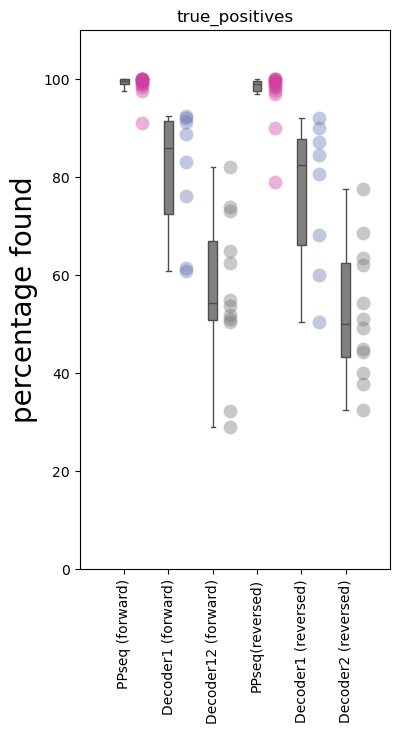

In [4]:
ppseq_df = pd.DataFrame(ED9_data_dict['ppseq_df'])
decoder_df = pd.DataFrame(ED9_data_dict['decoder_df'])
decoder2_df = pd.DataFrame(ED9_data_dict['decoder2_df'])

standard_insertion= ppseq_df.proportion_found.values[np.where(ppseq_df.type.values == 'standard_insertion')].astype(float) *100
backwards_insertion = ppseq_df.proportion_found.values[np.where(ppseq_df.type.values == 'backward_insertion')].astype(float) *100
mouse_standard_label= ppseq_df[ppseq_df.type == 'standard_insertion'].mouse_implant_recording.values

decoder_standard_insertion = list(decoder_df[decoder_df.type == 'standard_insertion'].proportion_found.astype(float)*100)
decoder_backwards_insertion = list(decoder_df[decoder_df.type == 'backwards_insertion'].proportion_found.astype(float)*100)
decoder_mouse_standard_label= decoder_df[decoder_df.type == 'standard_insertion'].mouse_implant_recording.values

decoder2_standard_insertion = list(decoder2_df[decoder2_df.type == 'standard_insertion'].proportion_found.astype(float)*100)
decoder2_backwards_insertion = list(decoder2_df[decoder2_df.type == 'backward_insertion'].proportion_found.astype(float)*100)
decoder2_mouse_standard_label= decoder2_df[decoder2_df.type == 'standard_insertion'].mouse_implant_recording.values

fig, ax= plt.subplots(1, 1,figsize=(4, 7))
ax.plot([0.4]*len(standard_insertion),standard_insertion,'o',alpha = 0.4, color = pink_,markeredgewidth=0,markersize = 10)
ax.plot([3.4]*len(backwards_insertion),backwards_insertion,'o',alpha = 0.4, color = pink_,markeredgewidth=0,markersize = 10)

ax.plot([1.4]*len(decoder_standard_insertion),decoder_standard_insertion,'o',alpha = 0.4, color = blue_,markeredgewidth=0,markersize = 10)
ax.plot([4.4]*len(decoder_backwards_insertion),decoder_backwards_insertion,'o',alpha = 0.4, color = blue_,markeredgewidth=0,markersize = 10)

ax.plot([2.4]*len(decoder2_standard_insertion),decoder2_standard_insertion,'o',alpha = 0.4, color = grey_,markeredgewidth=0,markersize = 10)
ax.plot([5.4]*len(decoder2_backwards_insertion),decoder2_backwards_insertion,'o',alpha = 0.4, color = grey_,markeredgewidth=0,markersize = 10)



data_lists = [standard_insertion, decoder_standard_insertion, decoder2_standard_insertion, backwards_insertion, decoder_backwards_insertion, decoder2_backwards_insertion]

x_positions = [1, 2, 3, 4, 5, 6]  # Define x positions for each box plot

# Create an empty list to store combined data
combined_data = []

# Combine data into a single list of tuples and align with x positions
for i, data in enumerate(data_lists):
    # Generate a list of tuples containing (x_position, value) pairs
    combined_data.extend([(x_positions[i], value) for value in data])

# Create DataFrame from combined data
combined_df = pd.DataFrame(combined_data, columns=["position", "value"])

# Create box plot
sns.boxplot(x="position", y="value", data=combined_df,width = 0.2, color = 'grey',showfliers=False)

# Set x-axis labels
plt.xticks(range(0, len(x_positions)), x_positions)



ax.set_xticklabels(('PPseq (forward)','Decoder1 (forward)','Decoder12 (forward)', 'PPseq(reversed)','Decoder1 (reversed)','Decoder2 (reversed)'), fontsize = 10,rotation='vertical')
ax.set_xlabel('',size = 20)
ax.set_ylabel('percentage found',size = 20)
ax.set_title('true_positives')


ax.set_ylim(0,110)
ax.set_xlim(-1,6)

### STATS



print('------------------------------------------------')

# Perform Kruskal-Wallis test
kw_statistic, kw_pvalue = kruskal(data_lists[0], data_lists[1], data_lists[2])
print("Kruskal-Wallis Test:")
print("Statistic:", kw_statistic)
print("p-value:", kw_pvalue)

# Perform Dunn's test with Bonferroni correction as post hoc test
posthoc_results = posthoc_dunn([data_lists[0], data_lists[1], data_lists[2]], p_adjust="bonferroni")
print("\nDunn's Test (with Bonferroni correction):")
print(posthoc_results)

print('------------------------------------------------')

# Perform Kruskal-Wallis test
kw_statistic, kw_pvalue = kruskal(data_lists[3], data_lists[4], data_lists[5])
print("Kruskal-Wallis Test:")
print("Statistic:", kw_statistic)
print("p-value:", kw_pvalue)

# Perform Dunn's test with Bonferroni correction as post hoc test
posthoc_results = posthoc_dunn([data_lists[3], data_lists[4], data_lists[5]], p_adjust="bonferroni")
print("\nDunn's Test (with Bonferroni correction):")
print(posthoc_results)

# figure E

------------------------------------------------
Kruskal-Wallis Test:
Statistic: 11.957183335082359
p-value: 0.0025323902293944585

Dunn's Test (with Bonferroni correction):
          1         2         3
1  1.000000  0.098866  0.002235
2  0.098866  1.000000  1.000000
3  0.002235  1.000000  1.000000
------------------------------------------------
Kruskal-Wallis Test:
Statistic: 13.122852167348647
p-value: 0.0014138679779201638

Dunn's Test (with Bonferroni correction):
          1        2         3
1  1.000000  0.05885  0.001382
2  0.058850  1.00000  1.000000
3  0.001382  1.00000  1.000000


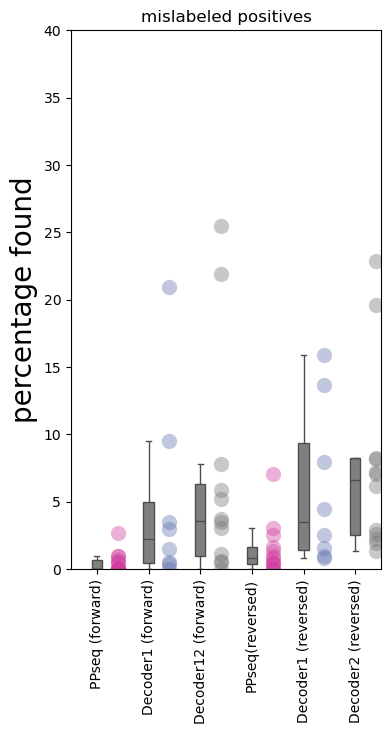

In [5]:
standard_insertion_mislabeled= ppseq_df.proportion_mislabeled.values[np.where(ppseq_df.type.values == 'standard_insertion')].astype(float) *100
backwards_insertion_mislabeled = ppseq_df.proportion_mislabeled.values[np.where(ppseq_df.type.values == 'backward_insertion')].astype(float) *100

decoder_standard_insertion_mislabeled = list(decoder_df[decoder_df.type == 'standard_insertion'].proportion_mislabeled.astype(float)*100)
decoder_backwards_insertion_mislabeled = list(decoder_df[decoder_df.type == 'backwards_insertion'].proportion_mislabeled.astype(float)*100)

decoder2_standard_insertion_mislabeled = list(decoder2_df[decoder2_df.type == 'standard_insertion'].proportion_mislabeled.astype(float)*100)
decoder2_backwards_insertion_mislabeled = list(decoder2_df[decoder2_df.type == 'backward_insertion'].proportion_mislabeled.astype(float)*100)



fig, ax= plt.subplots(1, 1,figsize=(4, 7))
ax.plot([0.4]*len(standard_insertion_mislabeled),standard_insertion_mislabeled,'o',alpha = 0.4, color = pink_,markeredgewidth=0,markersize = 11)
ax.plot([3.4]*len(backwards_insertion_mislabeled),backwards_insertion_mislabeled,'o',alpha = 0.4, color = pink_,markeredgewidth=0,markersize = 11)

ax.plot([1.4]*len(decoder_standard_insertion_mislabeled),decoder_standard_insertion_mislabeled,'o',alpha = 0.4, color = blue_,markeredgewidth=0,markersize = 11)
ax.plot([4.4]*len(decoder_backwards_insertion_mislabeled),decoder_backwards_insertion_mislabeled,'o',alpha = 0.4, color = blue_,markeredgewidth=0,markersize = 11)

ax.plot([2.4]*len(decoder2_standard_insertion_mislabeled),decoder2_standard_insertion_mislabeled,'o',alpha = 0.4, color = grey_,markeredgewidth=0,markersize = 11)
ax.plot([5.4]*len(decoder2_backwards_insertion_mislabeled),decoder2_backwards_insertion_mislabeled,'o',alpha = 0.4, color = grey_,markeredgewidth=0,markersize = 11)


data_lists = [standard_insertion_mislabeled, decoder_standard_insertion_mislabeled, decoder2_standard_insertion_mislabeled, backwards_insertion_mislabeled, decoder_backwards_insertion_mislabeled, decoder2_backwards_insertion_mislabeled]

x_positions = [1, 2, 3, 4, 5, 6]  # Define x positions for each box plot
# Create an empty list to store combined data
combined_data = []
# Combine data into a single list of tuples and align with x positions
for i, data in enumerate(data_lists):
    # Generate a list of tuples containing (x_position, value) pairs
    combined_data.extend([(x_positions[i], value) for value in data])
# Create DataFrame from combined data
combined_df = pd.DataFrame(combined_data, columns=["position", "value"])
# Create box plot
sns.boxplot(x="position", y="value", data=combined_df,width = 0.2, color = 'grey',showfliers=False)
# Set x-axis labels
plt.xticks(range(0, len(x_positions)), x_positions)


ax.set_xticklabels(('PPseq (forward)','Decoder1 (forward)','Decoder12 (forward)', 'PPseq(reversed)','Decoder1 (reversed)','Decoder2 (reversed)'), fontsize = 10,rotation='vertical')
ax.set_xlabel('',size = 20)
ax.set_ylabel('percentage found',size = 20)
ax.set_title('mislabeled positives')

ax.set_ylim(0,40)


#### STATS



print('------------------------------------------------')

# Perform Kruskal-Wallis test
kw_statistic, kw_pvalue = kruskal(data_lists[0], data_lists[1], data_lists[2])
print("Kruskal-Wallis Test:")
print("Statistic:", kw_statistic)
print("p-value:", kw_pvalue)

# Perform Dunn's test with Bonferroni correction as post hoc test
posthoc_results = posthoc_dunn([data_lists[0], data_lists[1], data_lists[2]], p_adjust="bonferroni")
print("\nDunn's Test (with Bonferroni correction):")
print(posthoc_results)

print('------------------------------------------------')

# Perform Kruskal-Wallis test
kw_statistic, kw_pvalue = kruskal(data_lists[3], data_lists[4], data_lists[5])
print("Kruskal-Wallis Test:")
print("Statistic:", kw_statistic)
print("p-value:", kw_pvalue)

# Perform Dunn's test with Bonferroni correction as post hoc test
posthoc_results = posthoc_dunn([data_lists[3], data_lists[4], data_lists[5]], p_adjust="bonferroni")
print("\nDunn's Test (with Bonferroni correction):")
print(posthoc_results)


# figure G

{np.int64(1): np.float64(99.07208577974481), np.int64(5): np.float64(98.31480471552501), np.int64(10): np.float64(98.90173103930123), np.int64(15): np.float64(97.02205279568331), np.int64(20): np.float64(97.69787938886141), np.int64(30): np.float64(96.39050421172033), np.int64(40): np.float64(94.50421689158071), np.int64(50): np.float64(91.34600092299834), np.int64(60): np.float64(85.93326318070469), np.int64(70): np.float64(78.98488574664837), np.int64(80): np.float64(65.33646018142771), np.int64(90): np.float64(32.933718195163905)}
{np.int64(1): np.float64(0.5678738860783), np.int64(5): np.float64(0.46765755809031695), np.int64(10): np.float64(0.49832661448777693), np.int64(15): np.float64(1.6140971704871716), np.int64(20): np.float64(1.019252157232294), np.int64(30): np.float64(0.8547446174221555), np.int64(40): np.float64(1.5238082503756136), np.int64(50): np.float64(2.3092367943667766), np.int64(60): np.float64(3.507409407874285), np.int64(70): np.float64(3.2057318347520978), np.i

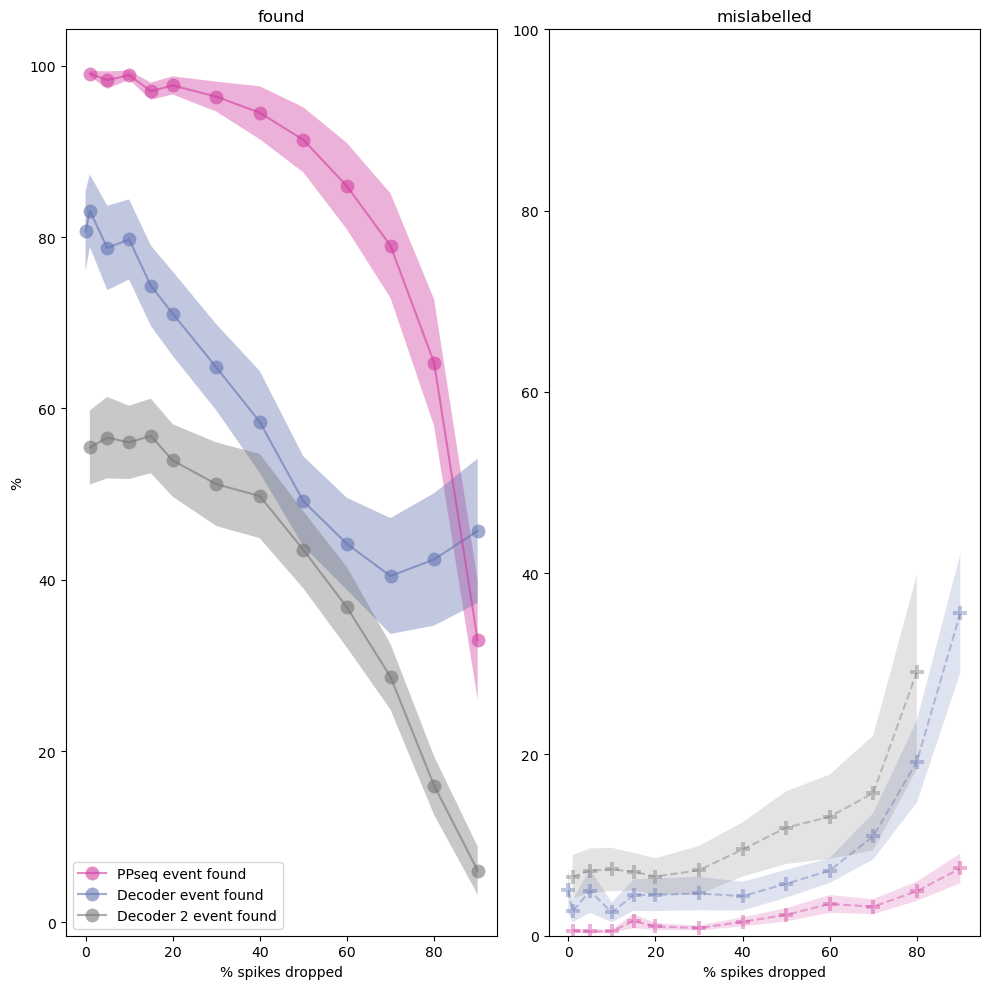

In [6]:
dropped_spikes_df = extract_data(ppseq_df,'dropped_spikes',mouse_standard_label,standard_insertion)
decoder_dropped_spikes_df = extract_data(decoder_df,'dropped_spikes',decoder_mouse_standard_label,decoder_standard_insertion)
decoder2_dropped_spikes_df = extract_data(decoder2_df,'dropped_spikes',decoder2_mouse_standard_label,decoder2_standard_insertion)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 10))
# PPseq
plot_method(
    ax,
    ax2,
    dropped_spikes_df,
    color=pink_,
    label_prefix="PPseq",
)

# Decoder
plot_method(
    ax,
    ax2,
    decoder_dropped_spikes_df,
    color=blue_,
    label_prefix="Decoder",
)

# Decoder 2
plot_method(
    ax,
    ax2,
    decoder2_dropped_spikes_df,
    color=grey_,
    label_prefix="Decoder 2",
)

# Formatting
ax.set_xlabel('% spikes dropped', size=10)
ax2.set_xlabel('% spikes dropped', size=10)
ax.set_ylabel('%', size=10)
ax.set_title('found')
ax2.set_title('mislabelled')
ax2.set_ylim(0, 100)
ax.legend()
plt.tight_layout()

# STATS =====================================================
# Main analysis
def extract_all_methods():
    """
    Extract dropped_spikes data for all methods
    """
    return {
        "ppseq": extract_data(
            ppseq_df, "dropped_spikes",
            mouse_standard_label, standard_insertion
        ),
        "decoder": extract_data(
            decoder_df, "dropped_spikes",
            decoder_mouse_standard_label, decoder_standard_insertion
        ),
        "decoder2": extract_data(
            decoder2_df, "dropped_spikes",
            decoder2_mouse_standard_label, decoder2_standard_insertion
        ),
    }

# Extract data
df_dict = extract_all_methods()
found_data, mislabeled_data = extract_stats_inputs(df_dict,standard_insertion,standard_insertion_mislabeled,decoder_standard_insertion,decoder_standard_insertion_mislabeled,decoder2_standard_insertion,decoder2_standard_insertion_mislabeled)

# Order matters for permanova
found_groups = [
    found_data["ppseq"],
    found_data["decoder"],
    found_data["decoder2"],
]

mislabeled_groups = [
    mislabeled_data["ppseq"],
    mislabeled_data["decoder"],
    mislabeled_data["decoder2"],
]

# Normality checks
check_normality(found_groups + mislabeled_groups)

# Non-parametric tests
run_triplewise_permanova(found_groups, label="found")
run_triplewise_permanova(mislabeled_groups, label="mislabelled")



# figure I

{np.int64(20): np.float64(96.54973589853799), np.int64(40): np.float64(92.2791301277454), np.int64(80): np.float64(83.43606507145878), np.int64(100): np.float64(78.2415073405975), np.int64(200): np.float64(62.093028590445435), np.int64(300): np.float64(42.6811139518885), np.int64(400): np.float64(37.1518497973599), np.int64(500): np.float64(28.8755811854794)}
{np.int64(20): np.float64(1.987505564261357), np.int64(40): np.float64(5.251825939209047), np.int64(80): np.float64(8.402809048153408), np.int64(100): np.float64(9.373562479385456), np.int64(200): np.float64(13.482253398777821), np.int64(300): np.float64(20.865622438282756), np.int64(400): np.float64(27.385020249449948), np.int64(500): np.float64(37.177395929874095)}
{np.int64(0): np.float64(80.65465290320424), np.int64(20): np.float64(53.605017774719755), np.int64(40): np.float64(50.06191885744866), np.int64(80): np.float64(57.959289560696845), np.int64(100): np.float64(58.75415042095506), np.int64(200): np.float64(44.56986103943

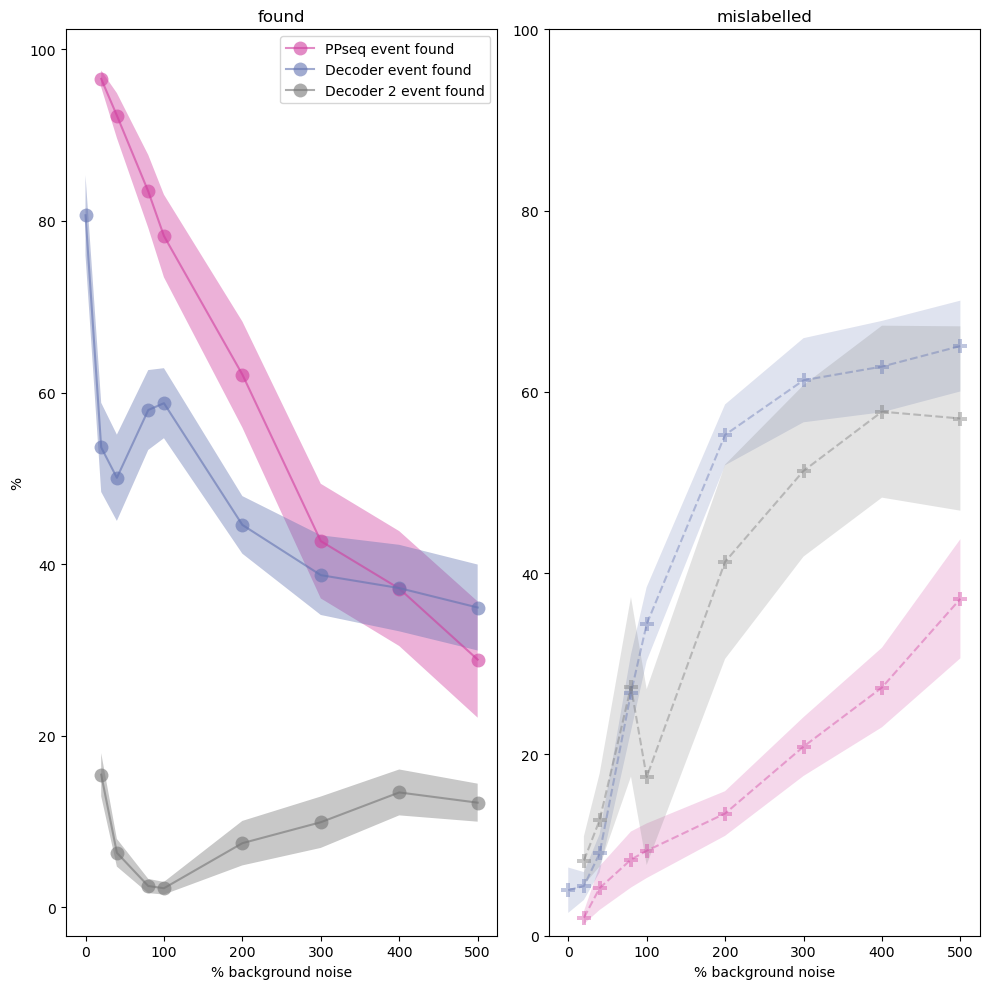

In [7]:
## load in data 
dropped_spikes_df = extract_data(ppseq_df,'background_noise',mouse_standard_label,standard_insertion)
decoder_dropped_spikes_df = extract_data(decoder_df,'background_noise',decoder_mouse_standard_label,decoder_standard_insertion)
decoder2_dropped_spikes_df = extract_data(decoder2_df,'background_noise',decoder2_mouse_standard_label,decoder2_standard_insertion)
decoder2_dropped_spikes_df.fillna(0, inplace=True)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 10))
# PPseq
plot_method(
    ax,
    ax2,
    dropped_spikes_df,
    color=pink_,
    label_prefix="PPseq",
)

# Decoder
plot_method(
    ax,
    ax2,
    decoder_dropped_spikes_df,
    color=blue_,
    label_prefix="Decoder",
)

# Decoder 2
plot_method(
    ax,
    ax2,
    decoder2_dropped_spikes_df,
    color=grey_,
    label_prefix="Decoder 2",
)

# Formatting
ax.set_xlabel('% background noise', size=10)
ax2.set_xlabel('% background noise', size=10)
ax.set_ylabel('%', size=10)
ax.set_title('found')
ax2.set_title('mislabelled')
ax2.set_ylim(0, 100)
ax.legend()
plt.tight_layout()

# STATS =====================================================
# Main analysis
def extract_all_methods():
    """
    Extract background_noise data for all methods
    """
    return {
        "ppseq": extract_data(
            ppseq_df, "background_noise",
            mouse_standard_label, standard_insertion
        ),
        "decoder": extract_data(
            decoder_df, "background_noise",
            decoder_mouse_standard_label, decoder_standard_insertion
        ),
        "decoder2": extract_data(
            decoder2_df, "background_noise",
            decoder2_mouse_standard_label, decoder2_standard_insertion
        ),
    }

# Extract data
df_dict = extract_all_methods()
found_data, mislabeled_data = extract_stats_inputs(df_dict,standard_insertion,standard_insertion_mislabeled,decoder_standard_insertion,decoder_standard_insertion_mislabeled,decoder2_standard_insertion,decoder2_standard_insertion_mislabeled)

# Order matters for permanova
found_groups = [
    found_data["ppseq"],
    found_data["decoder"],
    found_data["decoder2"],
]

mislabeled_groups = [
    mislabeled_data["ppseq"],
    mislabeled_data["decoder"],
    mislabeled_data["decoder2"],
]

# Normality checks
check_normality(found_groups + mislabeled_groups)

# Non-parametric tests
run_triplewise_permanova(found_groups, label="found")
run_triplewise_permanova(mislabeled_groups, label="mislabelled")


# figure K 

13613.0
14822.0
14911.0
17816.0
17817.0
17821.0
17822.0
17823.0
17824.0
25512.0
26215.0
26912.0
27013.0
17817.0
17816.0
13613.0
17823.0
17821.0
14911.0
17824.0
26912.0
13613.0
14911.0
17816.0
17817.0
17821.0
17822.0
17823.0
17824.0
25512.0
26215.0
26912.0
27013.0
{np.float64(0.03): np.float64(70.1923076923077), np.float64(0.1): np.float64(59.30769230769231), np.float64(0.2): np.float64(87.34615384615384), np.float64(0.5): np.float64(76.11538461538461), np.float64(1.0): np.float64(98.72847856692246), np.float64(2.0): np.float64(89.0), np.float64(5.0): np.float64(81.92307692307692), np.float64(10.0): np.float64(62.41758241648351), np.float64(20.0): np.float64(21.282051276923077), np.float64(30.0): np.float64(11.538461538461538)}
{np.float64(0.03): np.float64(4.042689353474717), np.float64(0.1): np.float64(13.473893383089994), np.float64(0.2): np.float64(3.402306101116557), np.float64(0.5): np.float64(8.93782985310899), np.float64(1.0): np.float64(0.4828168686925477), np.float64(2.0): np.

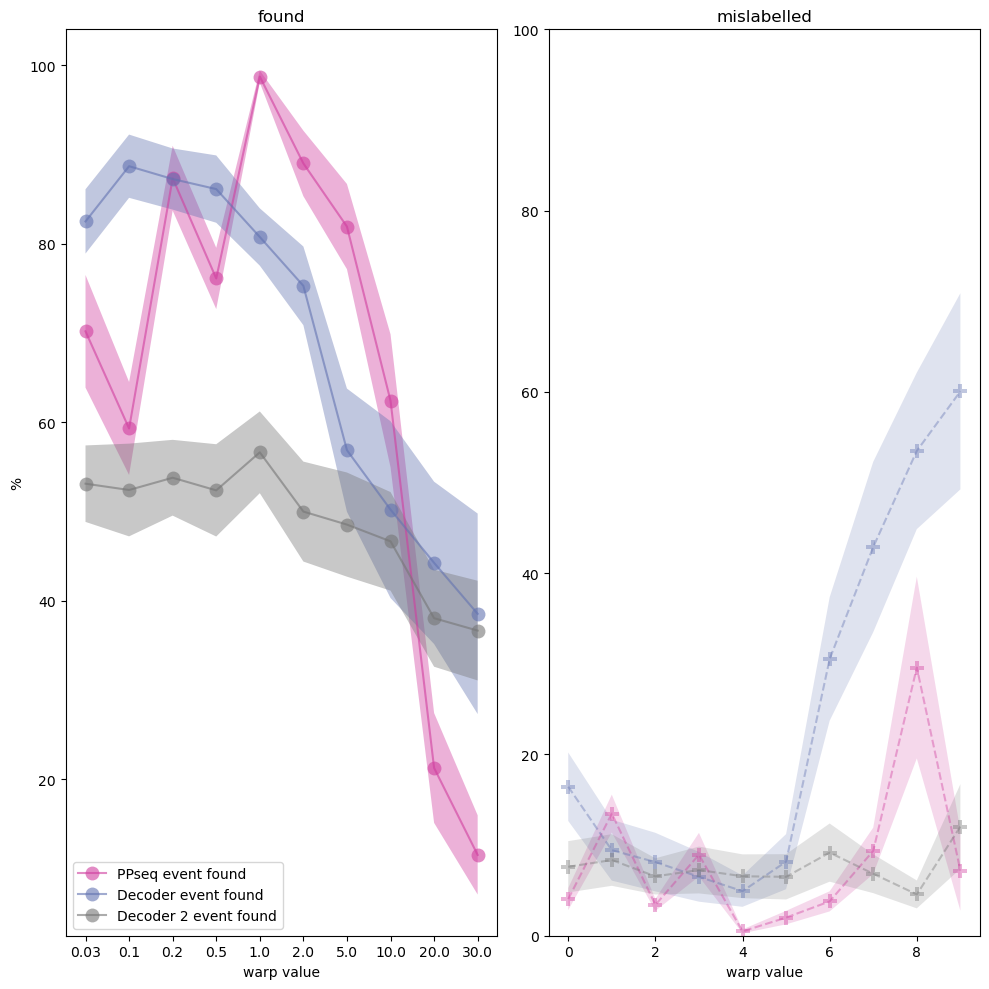

In [9]:
## load in data 
warp_spikes_df = extract_data_warp(ppseq_df,mouse_standard_label,standard_insertion_mislabeled,standard_insertion)
decod_warp_spikes_df = extract_data_warp(decoder_df,mouse_standard_label,decoder_standard_insertion_mislabeled,decoder_standard_insertion)
decod2_warp_spikes_df = extract_data_warp(decoder2_df,mouse_standard_label,decoder2_standard_insertion_mislabeled,decoder2_standard_insertion)
decod2_warp_spikes_df.fillna(0, inplace=True)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 10))
labels = list(np.sort(np.unique(warp_spikes_df.number.values)).astype(str))
ax.set_xticks(range(0,len(labels)))
ax.set_xticklabels(labels)
x_val = np.sort(list(range(0,len(np.unique(labels)))))


# PPseq
plot_method_warp(
    ax,
    ax2,
    warp_spikes_df,
    x_val,
    color=pink_,
    label_prefix="PPseq",
)

# Decoder
plot_method_warp(
    ax,
    ax2,
    decod_warp_spikes_df,
    x_val,
    color=blue_,
    label_prefix="Decoder",
)

# Decoder 2
plot_method_warp(
    ax,
    ax2,
    decod2_warp_spikes_df,
    x_val,
    color=grey_,
    label_prefix="Decoder 2",
)

# Formatting
ax.set_xlabel('warp value', size=10)
ax2.set_xlabel('warp value', size=10)
ax.set_ylabel('%', size=10)
ax.set_title('found')
ax2.set_title('mislabelled')
ax2.set_ylim(0, 100)
ax.legend()
plt.tight_layout()

# STATS =====================================================
# Main analysis
warp_spikes_df = extract_data_warp(ppseq_df,mouse_standard_label,standard_insertion_mislabeled,standard_insertion)
decod_warp_spikes_df = extract_data_warp(decoder_df,mouse_standard_label,decoder_standard_insertion_mislabeled,decoder_standard_insertion)
decod2_warp_spikes_df = extract_data_warp(decoder2_df,mouse_standard_label,decoder2_standard_insertion_mislabeled,decoder2_standard_insertion)

# Extract data
df_dict = {
        "ppseq": warp_spikes_df,
        "decoder": decod_warp_spikes_df,
        "decoder2": decod2_warp_spikes_df
    }

found_data, mislabeled_data = extract_stats_inputs(df_dict,standard_insertion,standard_insertion_mislabeled,decoder_standard_insertion,decoder_standard_insertion_mislabeled,decoder2_standard_insertion,decoder2_standard_insertion_mislabeled)

# Order matters for permanova
found_groups = [
    found_data["ppseq"],
    found_data["decoder"],
    found_data["decoder2"],
]

mislabeled_groups = [
    mislabeled_data["ppseq"],
    mislabeled_data["decoder"],
    mislabeled_data["decoder2"],
]

# Normality checks
check_normality(found_groups + mislabeled_groups)

# Non-parametric tests
run_triplewise_permanova(found_groups, label="found")
run_triplewise_permanova(mislabeled_groups, label="mislabelled")


# figure M

{np.int64(10): np.float64(96.65551989737311), np.int64(20): np.float64(97.02114733066546), np.int64(30): np.float64(94.83897762515765), np.int64(40): np.float64(96.5399988818907), np.int64(50): np.float64(91.56980552520832), np.int64(60): np.float64(86.83927549343561), np.int64(70): np.float64(80.7175082161753), np.int64(80): np.float64(81.16370061094207), np.int64(90): np.float64(78.2336110221566), np.int64(100): np.float64(74.88137210264804)}
{np.int64(10): np.float64(1.69777670550712), np.int64(20): np.float64(0.6294271655303585), np.int64(30): np.float64(2.647017264795626), np.int64(40): np.float64(1.6034670161655475), np.int64(50): np.float64(2.941680665290958), np.int64(60): np.float64(5.113681805933632), np.int64(70): np.float64(7.880847994664399), np.int64(80): np.float64(7.8874247970007065), np.int64(90): np.float64(7.63812263308571), np.int64(100): np.float64(7.928312060367665)}
{np.int64(0): np.float64(80.65465290320424), np.int64(10): np.float64(77.94861952406892), np.int64

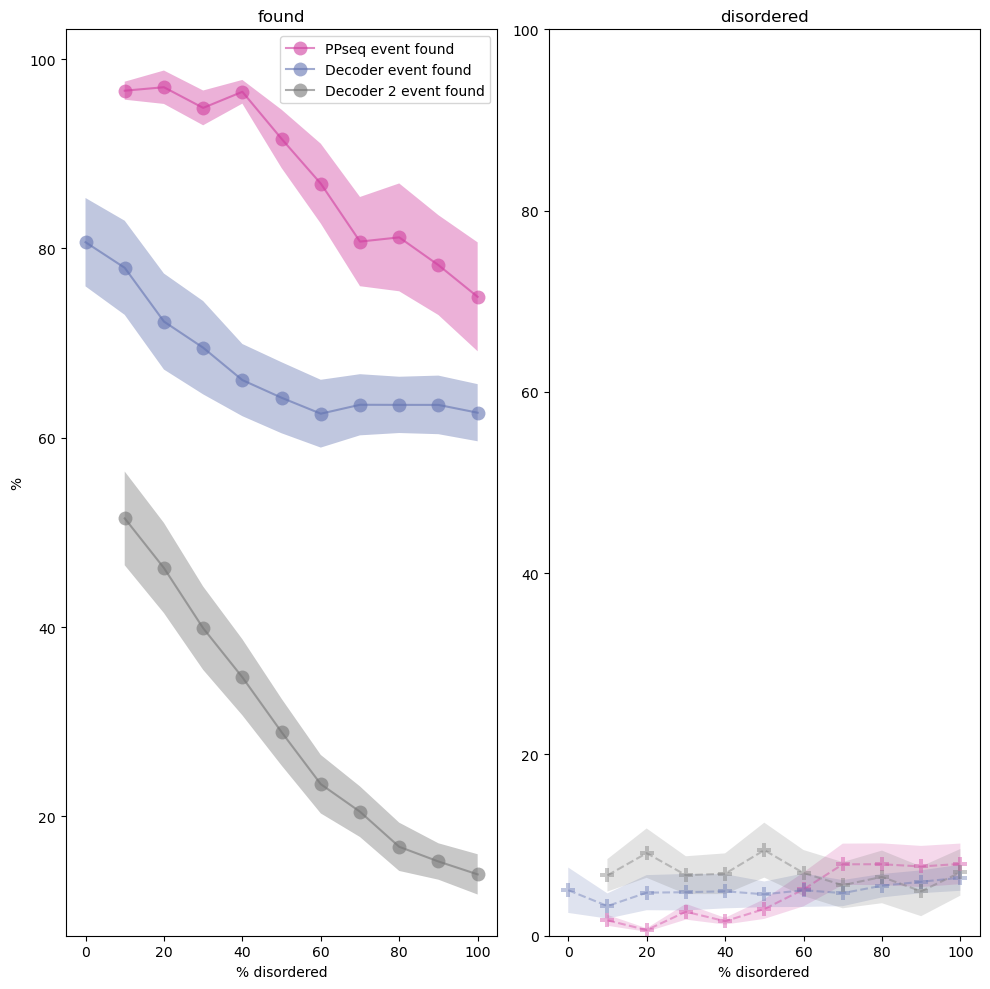

In [10]:

dropped_spikes_df = extract_data(ppseq_df,'disorered_spikes',mouse_standard_label,standard_insertion)
decoder_dropped_spikes_df = extract_data(decoder_df,'swapped_spikes',decoder_mouse_standard_label,decoder_standard_insertion)
decoder2_dropped_spikes_df = extract_data(decoder2_df,'disorered_spikes',decoder2_mouse_standard_label,decoder2_standard_insertion)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 10))
# PPseq
plot_method(
    ax,
    ax2,
    dropped_spikes_df,
    color=pink_,
    label_prefix="PPseq",
)

# Decoder
plot_method(
    ax,
    ax2,
    decoder_dropped_spikes_df,
    color=blue_,
    label_prefix="Decoder",
)

# Decoder 2
plot_method(
    ax,
    ax2,
    decoder2_dropped_spikes_df,
    color=grey_,
    label_prefix="Decoder 2",
)

# Formatting
ax.set_xlabel('% disordered', size=10)
ax2.set_xlabel('% disordered', size=10)
ax.set_ylabel('%', size=10)
ax.set_title('found')
ax2.set_title('disordered')
ax2.set_ylim(0, 100)
ax.legend()
plt.tight_layout()

# STATS =====================================================
# Main analysis
def extract_all_methods():
    """
    Extract disorered_spikes data for all methods
    """
    return {
        "ppseq": extract_data(
            ppseq_df, "disorered_spikes",
            mouse_standard_label, standard_insertion
        ),
        "decoder": extract_data(
            decoder_df, "swapped_spikes",
            decoder_mouse_standard_label, decoder_standard_insertion
        ),
        "decoder2": extract_data(
            decoder2_df, "disorered_spikes",
            decoder2_mouse_standard_label, decoder2_standard_insertion
        ),
    }

# Extract data
df_dict = extract_all_methods()
found_data, mislabeled_data = extract_stats_inputs(df_dict,standard_insertion,standard_insertion_mislabeled,decoder_standard_insertion,decoder_standard_insertion_mislabeled,decoder2_standard_insertion,decoder2_standard_insertion_mislabeled)

# Order matters for permanova
found_groups = [
    found_data["ppseq"],
    found_data["decoder"],
    found_data["decoder2"],
]

mislabeled_groups = [
    mislabeled_data["ppseq"],
    mislabeled_data["decoder"],
    mislabeled_data["decoder2"],
]

# Normality checks
check_normality(found_groups + mislabeled_groups)

# Non-parametric tests
run_triplewise_permanova(found_groups, label="found")
run_triplewise_permanova(mislabeled_groups, label="mislabelled")

